In [1]:
%matplotlib inline

In [16]:
def make_image(filepath,outdir=None,coord=None,size=0.05,plotname=None):
    import numpy as np
    import aplpy as apl
    import matplotlib
#     matplotlib.use('Agg')
    import os

    mag = 1.5
    if coord == None:
        # Coordinates of BHR71:
        ra_cen  = 180.3985138
        dec_cen = -65.14783478
    else:
        ra_cen = coord[0]
        dec_cen = coord[1]

    # At 178 pc, 10000 AU correspond to 57.96 arcsec

    im = apl.FITSFigure(filepath,north=True)

    im.show_colorscale(cmap='Greys',stretch='arcsinh')

    im.recenter(ra_cen,dec_cen,width=size,height=size)

    im.add_grid()
    im.grid.set_xspacing(size/5.)
    im.grid.set_yspacing(size/5.)
    im.grid.set_color('green')
    im.set_nan_color('black')
    im.tick_labels.set_font(size=18)
    # im.set_grid_alpha(0.2)

    im.add_colorbar()
    im.colorbar.set_font(size=18)
    im.colorbar.set_axis_label_text('Intensity (MJy/sr)')
    im.colorbar.set_axis_label_font(size=18)
#     im.colorbar.set_frame_color('face')
    im.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
    im.axis_labels.set_font(size=18)
    
    plotdir = os.path.dirname(filepath)
    if plotname == None:
        plotname = raw_input('What is the plot name: ')
        print plotname
    im.save(plotdir+'/'+plotname+'.pdf',format='pdf',transparent=True)


In [6]:
irac1 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC1_mosaic.fits'
irac2 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC2_mosaic.fits'
irac3 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC3_mosaic.fits'
irac4 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC4_mosaic.fits'

In [3]:
path = [irac1,irac2,irac3,irac4]
for ipath in path:
    make_image(ipath)

NameError: name 'make_image' is not defined

##Spitzer Image

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmprJz1Eu


INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmprJz1Eu [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpLBM5jG


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpLBM5jG [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmp8ZNOX8


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmp8ZNOX8 [montage_wrapper.wrappers]
INFO

INFO:astropy:Red:


: Red: [aplpy.rgb]
INFO

INFO:astropy:vmin =  1.640e+00 (auto)
INFO:astropy:vmax =  2.718e+01 (auto)
INFO:astropy:Green:


: vmin =  1.640e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.718e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO

INFO:astropy:vmin = -4.998e-03 (auto)
INFO:astropy:vmax =  2.973e+01 (auto)
INFO:astropy:Blue:


: vmin = -4.998e-03 (auto) [aplpy.rgb]
INFO: vmax =  2.973e+01 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO

INFO:astropy:vmin =  1.520e-01 (auto)
INFO:astropy:vmax =  4.131e+01 (auto)


: vmin =  1.520e-01 (auto) [aplpy.rgb]
INFO: vmax =  4.131e+01 (auto) [aplpy.rgb]


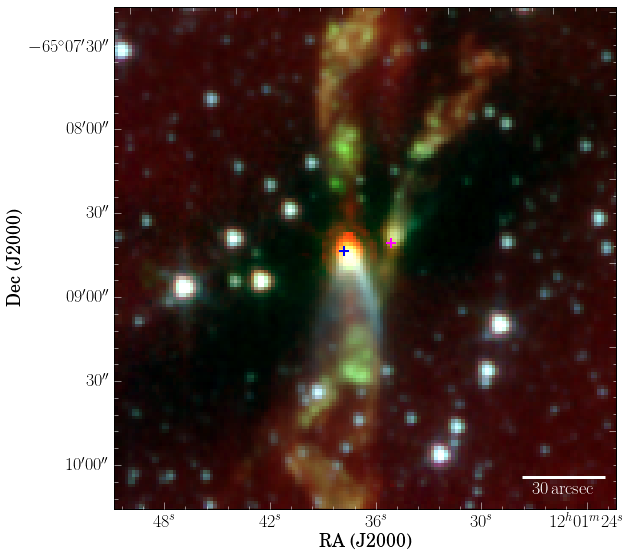

In [14]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([irac4, irac2, irac1],'/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb.fits','test_irac.tif',stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_irac_comb_2d.fits')
img.show_rgb('test.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.05,height=0.05)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_irac.pdf', format='pdf', dpi=300)

##2MASS Image

In [7]:
twomass_j = '/Users/yaolun/bhr71/data/photometry/2mass_j_band.fits'
twomass_h = '/Users/yaolun/bhr71/data/photometry/2mass_h_band.fits'
twomass_k = '/Users/yaolun/bhr71/data/photometry/2mass_k_band.fits'

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmp56fvgc


INFO: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmp56fvgc [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpNSRS0h


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpNSRS0h [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpcI8dBc


: Deleting work directory /var/folders/d2/xn0qhb7x2p7gqlvz33zdqrsh0000gn/T/tmpcI8dBc [montage_wrapper.wrappers]
INFO

INFO:astropy:Red:


: Red: [aplpy.rgb]
INFO

INFO:astropy:vmin =  6.160e+02 (auto)
INFO:astropy:vmax =  8.090e+02 (auto)
INFO:astropy:Green:


: vmin =  6.160e+02 (auto) [aplpy.rgb]
INFO: vmax =  8.090e+02 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO

INFO:astropy:vmin =  5.219e+02 (auto)
INFO:astropy:vmax =  7.005e+02 (auto)
INFO:astropy:Blue:


: vmin =  5.219e+02 (auto) [aplpy.rgb]
INFO: vmax =  7.005e+02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO

INFO:astropy:vmin =  1.219e+02 (auto)
INFO:astropy:vmax =  2.188e+02 (auto)


: vmin =  1.219e+02 (auto) [aplpy.rgb]
INFO: vmax =  2.188e+02 (auto) [aplpy.rgb]


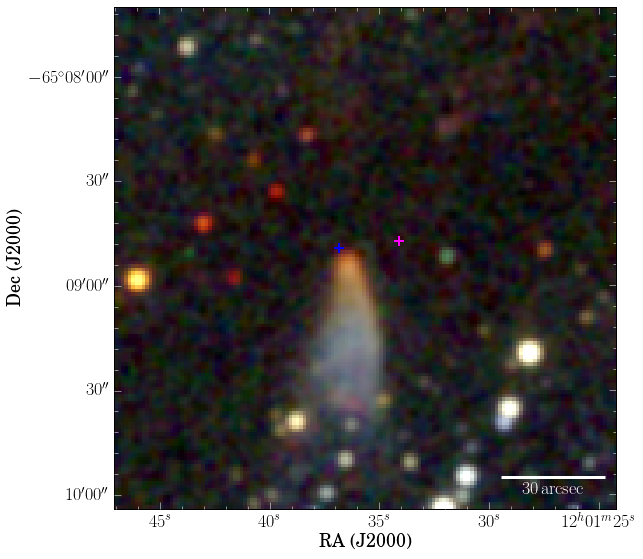

In [13]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([twomass_k, twomass_h, twomass_j],'/Users/yaolun/bhr71/data/photometry/2mass_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/2mass_comb.fits','test_2mass.tif',stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/2mass_comb_2d.fits')
img.show_rgb('test_2mass.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.04,height=0.04)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_2mass.pdf', format='pdf', dpi=300)

##Herschel-PACS image

In [1]:
pacs70 = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/1342224922/browseProduct/blue_JScanam_map/hpacs_25HPPJSMAPB_blue_1202_m6509_00_v1.0_1434550765178.fits'
pacs100 = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/1342224924/browseProduct/blue_JScanam_map/hpacs_25HPPJSMAPB_green_1202_m6509_00_v1.0_1434550526014.fits'
pacs160 = '/Users/yaolun/bhr71/data/photometry/herschel_photometry/1342224922/browseProduct/red_JScanam_map/hpacs_25HPPJSMAPR_1202_m6509_00_v1.0_1434550765178.fits'

In [2]:
import aplpy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Coordinates of BHR71:
ra_cen  = 180.3985138
dec_cen = -65.14783478

# Making a FITS cube with Montage. Data of different projections, field
# of view, and resolution will be modified to match one another for
# compositing.

aplpy.make_rgb_cube([pacs70, pacs100, pacs160],'/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb.fits')

# Now that the data cube is created, we can make a color image from the data for plotting.

aplpy.make_rgb_image('/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb.fits','test_pacs.tif',stretch_r='arcsinh',stretch_g='arcsinh',stretch_b='arcsinh')

img = aplpy.FITSFigure('/Users/yaolun/bhr71/data/photometry/herschel_pacs_comb_2d.fits')
img.show_rgb('test.tif',flip=True)

img.recenter(ra_cen,dec_cen,width=0.05,height=0.05)

# source coordinate from Chen 2008
# 12 01 36.81  -65 08 49.22
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='b', s=120, linewidth=2)
# add label for BHR71 IRS2
c = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
img.show_markers(c.ra.degree, c.dec.degree, marker='+', c='Magenta', s=120, linewidth=2)

# img.add_grid()
# img.grid.set_xspacing(0.05/5.)
# img.grid.set_yspacing(0.05/5.)
# # img.grid.set_color('green')
# img.set_nan_color('black')
img.tick_labels.set_font(size=18)
# setting for scalebar

img.add_scalebar(30/3600.)
img.scalebar.set_length(30 * u.arcsecond)
img.scalebar.set_label(r'$\rm{30\,arcsec}$')
img.scalebar.set_font(size=18)
img.scalebar.set(linestyle='solid', color='white', linewidth=3)

img.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
img.axis_labels.set_font(size=18)
img.set_tick_color('white')
img.set_tick_labels_style('latex')
img.set_labels_latex(True)

img.save('bhr71_pacs.pdf', format='pdf', dpi=300)

ImportError: No module named aplpy

In [4]:
import aplpy

ImportError: No module named aplpy